In [1]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import sklearn
import sklearn.datasets
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingClassifier
np.set_printoptions(threshold=np.inf)

In [2]:
# read in train and test data
train = pd.read_csv("data/training_data.csv")
test = pd.read_csv("data/testing_data.csv")
trainNames = pd.read_csv("data/training_data_names.csv")
testNames = pd.read_csv("data/dataNames.csv")
train.drop(['Unnamed: 0'], axis=1, inplace=True)
test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
# assign training X and y parameters using proper data structure
X_train = train.drop("MVP_dummy", axis=1)
y_train = train['MVP_dummy']
print(X_train.shape, y_train.shape)
# the variables used are listed below. I ranked each variable for every player based on league and year to 
# better train the data. This process is outlined in the Machine_Learning_Data_Cleansing notebook.
print(list(X_train))

(2431, 21) (2431,)
['yearID', 'G', 'PA', 'HR', 'R', 'RBI', 'SB', 'ISO', 'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'BsR', 'Off', 'Def', 'WAR', 'playerid', 'Win_percent', 'lgID_y']


In [4]:
# I used a gradient boosting classifier as my model, this works well with highly correlated variables, which is the 
# case with most baseball data. 
model= GradientBoostingClassifier(n_estimators=10000, learning_rate=0.1, max_depth=1, random_state=0)
# Train the model using the training sets and check score
model.fit(X_train, y_train)
# R-squared is 1.0, best possible score
print(f"R-squared = {model.score(X_train,y_train)}")
#Predict Output
predicted= model.predict(X_train)
res = y_train - predicted
rmse = math.sqrt(sum(res**2))
# RMSE = 0.0, best possible score
print(f"RMSE = {rmse}" )
print(predicted[:100])
print(y_train.tolist()[:100])
results = pd.DataFrame({"playerid": X_train['playerid'], "Prediction": predicted, "Actual": y_train, "yearID": X_train['yearID'], 'lgID': X_train['lgID_y']}).reset_index(drop=True)


R-squared = 1.0
RMSE = 0.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


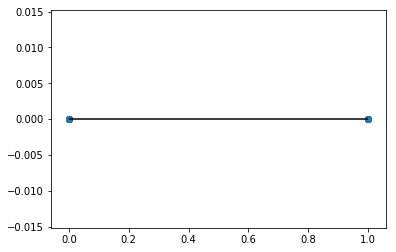

In [5]:
# plot residuals to show no difference between predicted and actual results 
plt.scatter(predicted, res)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max())
plt.show()

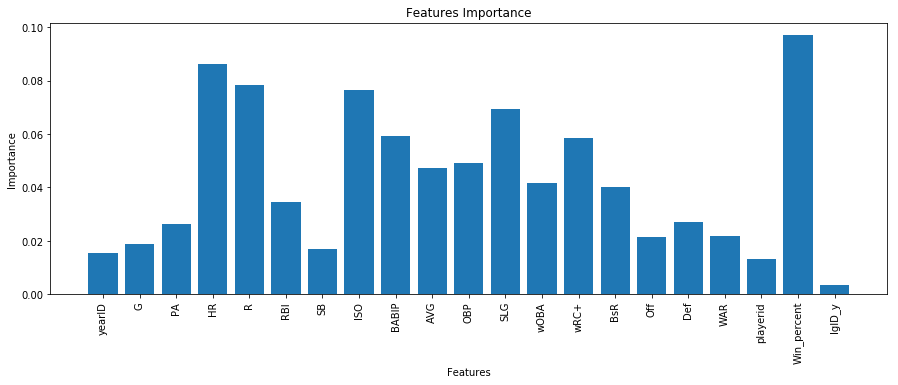

In [6]:
# plot model feature importance, showing the impact of each independent variable on the likelihood of winning the MVP
# interesting to see that winning percentage has the highest impact, and HR has the most impact of any individual stat
# this plot shows what the MVP voters have cared about most over the past 20 years
plt.figure(1, figsize=(15, 5))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

In [7]:
# Here's the table of the predicted vs actual results. Each of the predictions made are correct.
winners = results.loc[results['Actual'] == 1]
winnersNames = pd.merge(winners, trainNames, on=['playerid', 'yearID'], how='inner').drop_duplicates()
winnersNames = pd.DataFrame({"Actual": winnersNames['Actual'], 'Prediction': winnersNames['Prediction'], 'Name': winnersNames['Name'], 'Year': winnersNames['yearID']})
winnersNames

,Actual,Name,Prediction,Year
0,1,Juan Gonzalez,1,1998
1,1,Sammy Sosa,1,1998
2,1,Chipper Jones,1,1999
3,1,Ivan Rodriguez,1,1999
4,1,Jeff Kent,1,2000
5,1,Jason Giambi,1,2000
6,1,Ichiro Suzuki,1,2001
7,1,Barry Bonds,1,2001
8,1,Barry Bonds,1,2002
9,1,Miguel Tejada,1,2002


In [8]:
# Time to create predictions using the model with 2018 data
X_test = test.drop("MVP_dummy", axis=1)
y_test = test['MVP_dummy']
print(X_test.shape, y_test.shape)

(140, 21) (140,)


In [9]:
# predict using model.predict_proba(). This creates a probability of each player input's likelihood of winning the MVP
predict = model.predict_proba(X_test)
predict = pd.DataFrame(predict, columns = ["prob", "non-prob"])
results = pd.DataFrame({"playerid": X_test['playerid'], "prob": predict['prob'], 'lgID': X_test['lgID_y']})
# results['prob'] = (1-results['prob'])*100
results = results.sort_values(by = 'prob')
NL = results.loc[results['lgID'] == 1]
AL = results.loc[results['lgID'] == 0]

In [10]:
# More data cleaning here, and selecting the top 10 probabilities from each league
ALtop10 = AL.head(6).reset_index(drop=True)
NLtop10 = NL.head().reset_index(drop=True)

testingNames = pd.DataFrame({"playerid": testNames['playerid'], 'Name': testNames['Name']})
testingNames

mergedAL = pd.merge(ALtop10, testingNames, on = ['playerid'], how='inner').drop_duplicates()
mergedNL = pd.merge(NLtop10, testingNames, on = ['playerid'], how='inner').drop_duplicates()
mergedAL['prob'] = (1-mergedAL['prob'])*100
mergedNL['prob'] = (1-mergedNL['prob'])*100

In [11]:
# Here are the results. Both races are not very close, with Mookie Betts and Christian Yelich as the front runners for
# each league. Each finalist is represented except Nolan Arenado and Jose Ramirez (He was 6th most likely, and Manny 
# Machado should be removed from contention).  
print(mergedAL)
print(mergedNL)

    lgID  playerid       prob                  Name
0      0     13611  99.999577          Mookie Betts
4      0     10155  43.645460            Mike Trout
11     0      6184   0.000414         J.D. Martinez
14     0     11737   0.000133  Nicholas Castellanos
18     0     11493   0.000093         Manny Machado
23     0     13510   0.000082          Jose Ramirez
    lgID  playerid        prob              Name
0      1     11477  100.000000  Christian Yelich
5      1     12979   39.360487       Javier Baez
7      1     12564   36.885602      Trevor Story
9      1     12861    6.207125    Anthony Rendon
13     1      5361    1.088616   Freddie Freeman


0             Mookie Betts
4               Mike Trout
11           J.D. Martinez
14    Nicholas Castellanos
18           Manny Machado
23            Jose Ramirez
Name: Name, dtype: object
0     99.999577
4     43.645460
11     0.000414
14     0.000133
18     0.000093
23     0.000082
Name: prob, dtype: float64


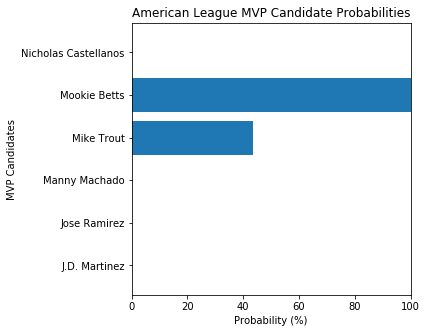

In [12]:
# graph showing probabiliites as horizontal bar graphs for AL race
X = mergedAL['Name']
y = mergedAL['prob']
print(X)
print(y)

plt.figure(figsize=(5, 5))
plt.barh(X, y)

plt.xlabel("Probability (%)")
plt.ylabel("MVP Candidates")
plt.title("American League MVP Candidate Probabilities")

plt.xlim(0, 100)
plt.show()

0     Christian Yelich
5          Javier Baez
7         Trevor Story
9       Anthony Rendon
13     Freddie Freeman
Name: Name, dtype: object
0     100.000000
5      39.360487
7      36.885602
9       6.207125
13      1.088616
Name: prob, dtype: float64


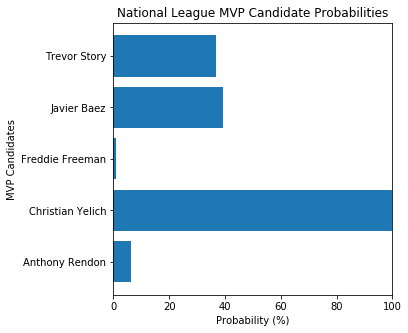

In [13]:
# graph showing probabiliites as horizontal bar graphs for NL race
X = mergedNL['Name']
y = mergedNL['prob']
print(X)
print(y)

plt.figure(figsize=(5, 5))
plt.barh(X, y)

plt.xlabel("Probability (%)")
plt.ylabel("MVP Candidates")
plt.title("National League MVP Candidate Probabilities")


plt.xlim(0, 100)
plt.show()